# En este Notebook aplicaremos las transformaciones de variables mas utilizadas

In [3]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import scipy.stats as stats

import sys
sys.path.append('/home/ia/cursoECI/cursoIV/src/')
import diagnostic_functions


In [4]:
# Cargando datos Boston House
data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


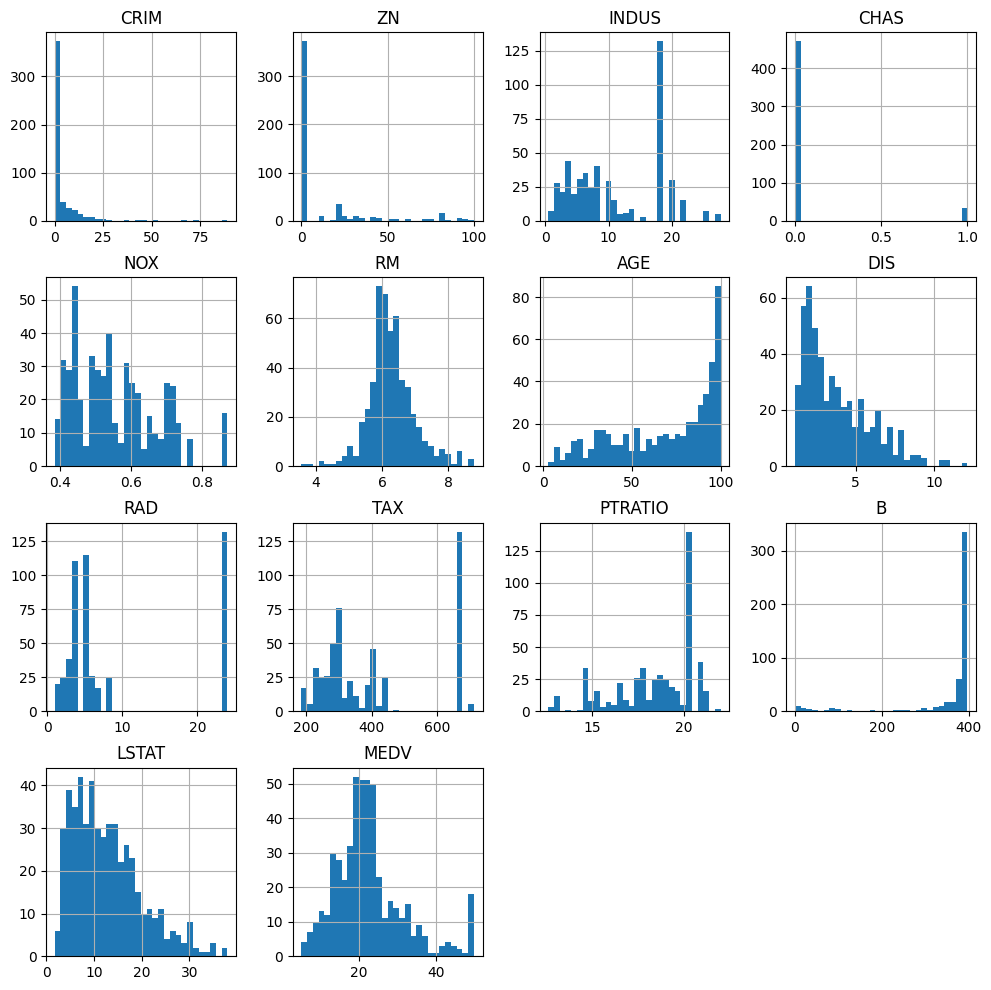

In [5]:
# Graficamos los histogramas para inspeccionar las variables
data.hist(bins=30, figsize=(12,12))
plt.show()

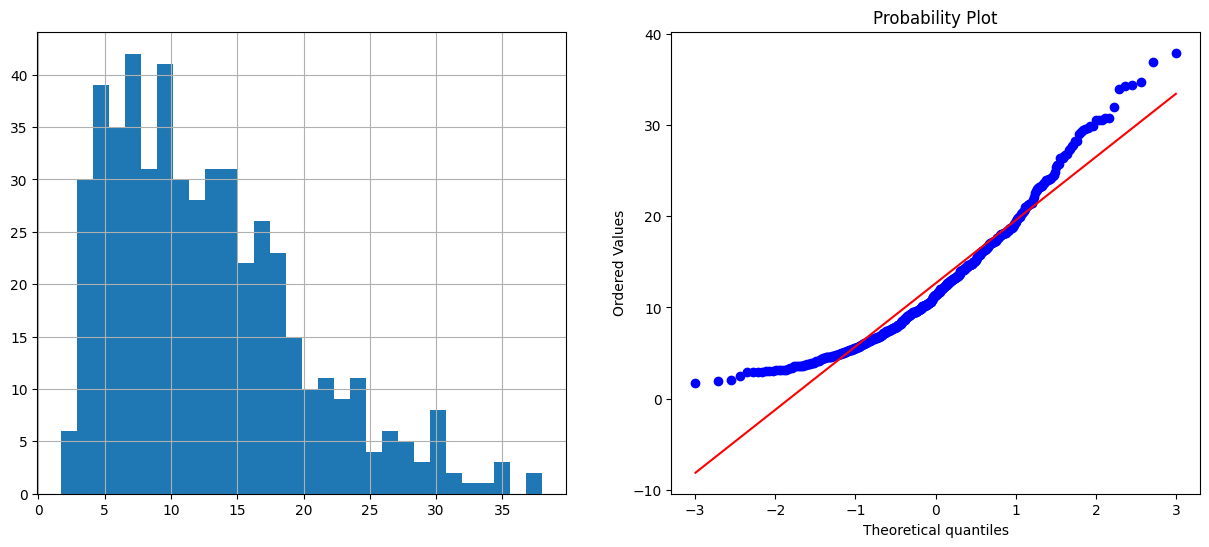

In [6]:
# Graficamos la distribución original
diagnostic_functions.diagnostic_plots1(data, 'LSTAT')

### Tranformación logaritmica

In [7]:
# Hecemos una copia del dataframe donde almacenaremos las variables modificadas
data_tf = data.copy()

In [8]:
# Aplicamos transformacióon logarítmica al conjunto de variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

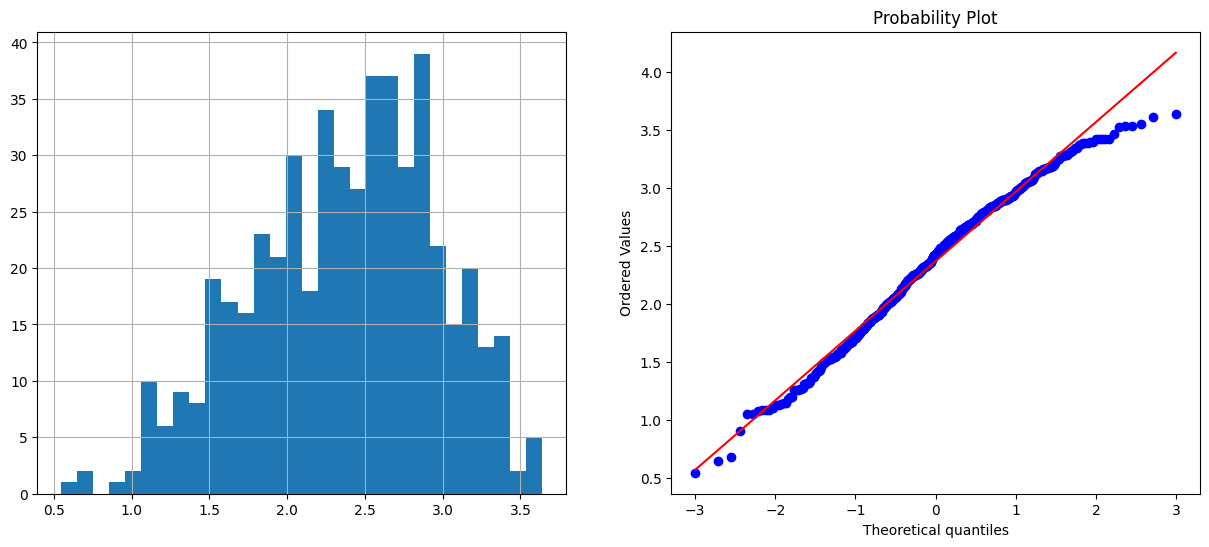

In [9]:
# Usamos la función de dignóstico para visualizar las variables transformadas

diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Transformación de potencia

In [10]:
# Hacemos una copia del dataframe

data_tf = data.copy()

In [11]:
# Aplicamos una transformación de potencia (0.3) al cto. de variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(data[['LSTAT', 'NOX', 'DIS', 'RM']], .3)

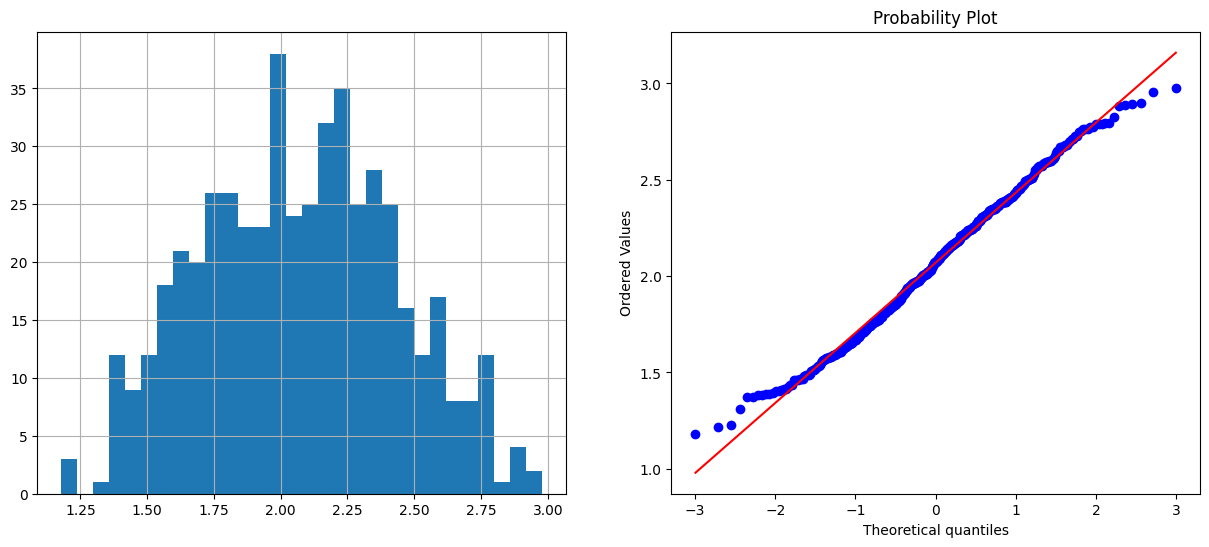

In [12]:
# Visualizamos la trasformación

diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Transformación Box-Cox usando scipy

In [13]:
# Hecemos una copia del dataframe donde almacenaremos las variables modificadas

data_tf = data.copy()

Optimal λ:  0.22776736359475297


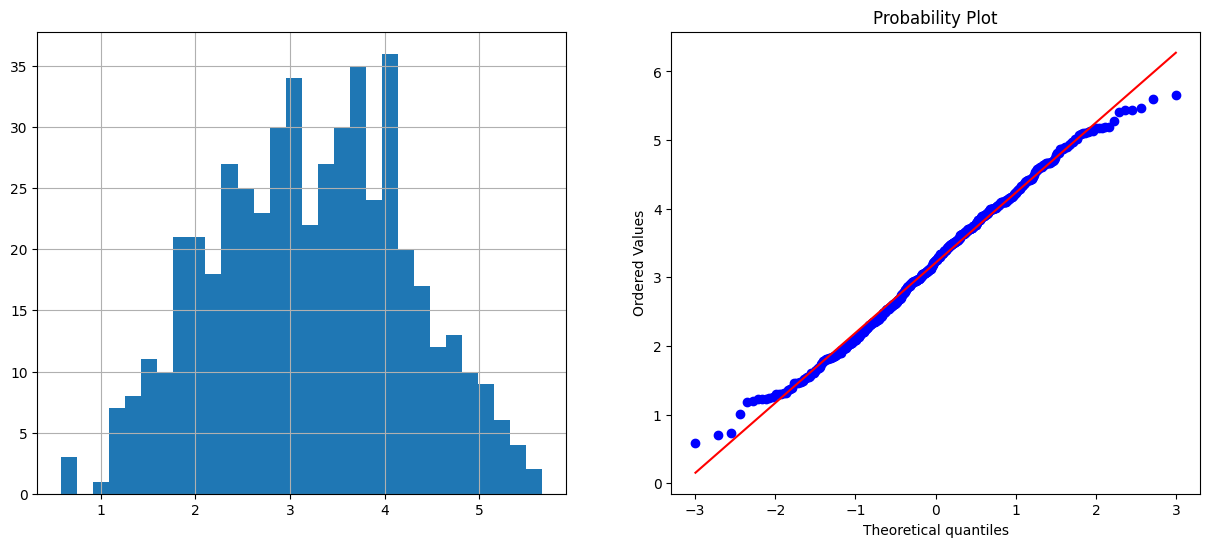

In [14]:
# Aplicamos transformación Box-Cox a la variable LSTAT
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# IMprimimos el óptimo lambda encontrado para LSTAT
print('Optimal λ: ', param)

# visualizamos la variable transformada
diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Transformación Yeo-Johnson con scipy

In [15]:
# Hacemos una copia del dataframe

data_tf = data.copy()

Optimal λ:  0.15370553340077206


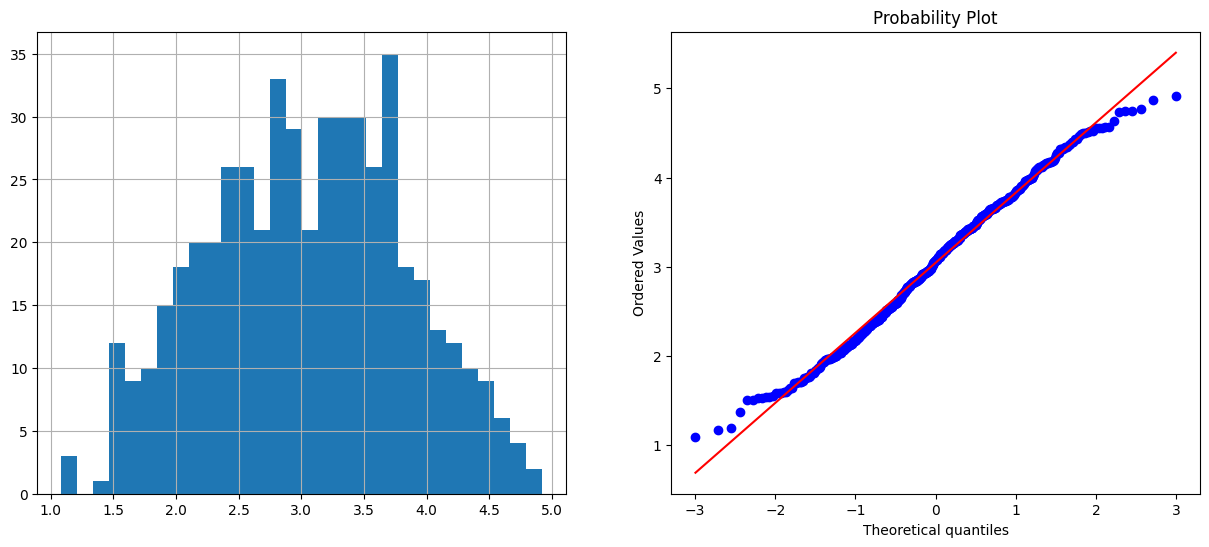

In [16]:
# Aplicamos la transformación Yeo_johnson a la variable LSTAT

data_tf['LSTAT'], param = stats.yeojohnson(data['LSTAT']) 

# Imprimimos el óptimo lambda seleccionado para esta variable
print('Optimal λ: ', param)

# visualizamos la transformación
diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Transformación recíproica con NumPy


In [17]:
data_tf = data.copy()

In [18]:
# Se aplica el recíproco al conjunto de variables

data_tf[['LSTAT', 'NOX']] = np.reciprocal(data_tf[['LSTAT', 'NOX']])


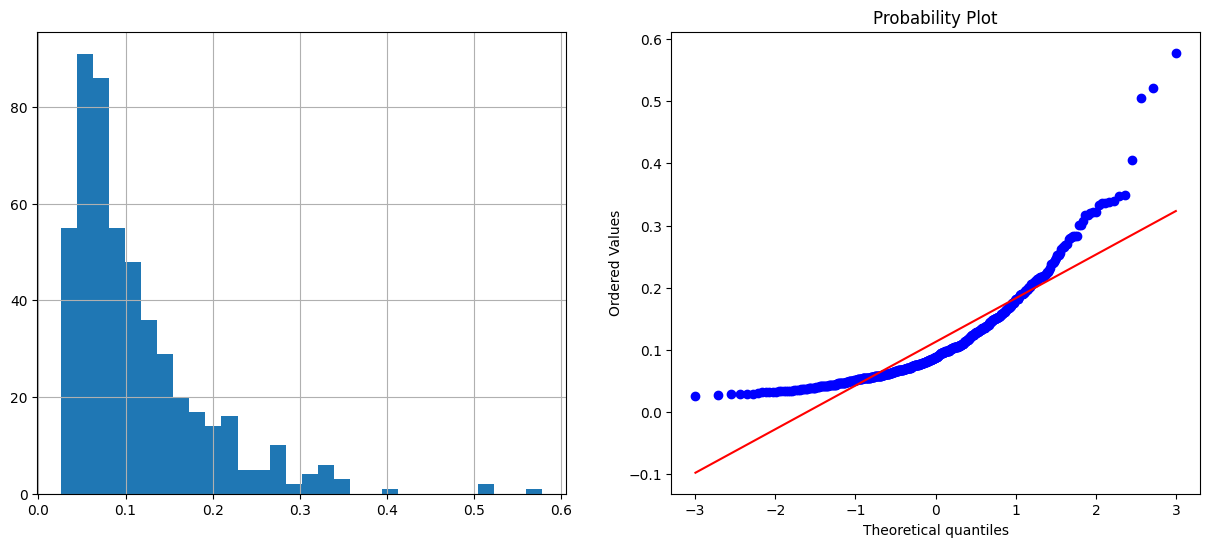

In [19]:
# visualizamos la transformación
diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Transformación arcoseno

In [20]:
data_tf = data.copy()

In [21]:

# Transforma los datos

#data_tf[['LSTAT']] = np.arcsin(np.sqrt(data_tf[['LSTAT']]))
data_tf.LSTAT.isnull



<bound method Series.isnull of 0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64>

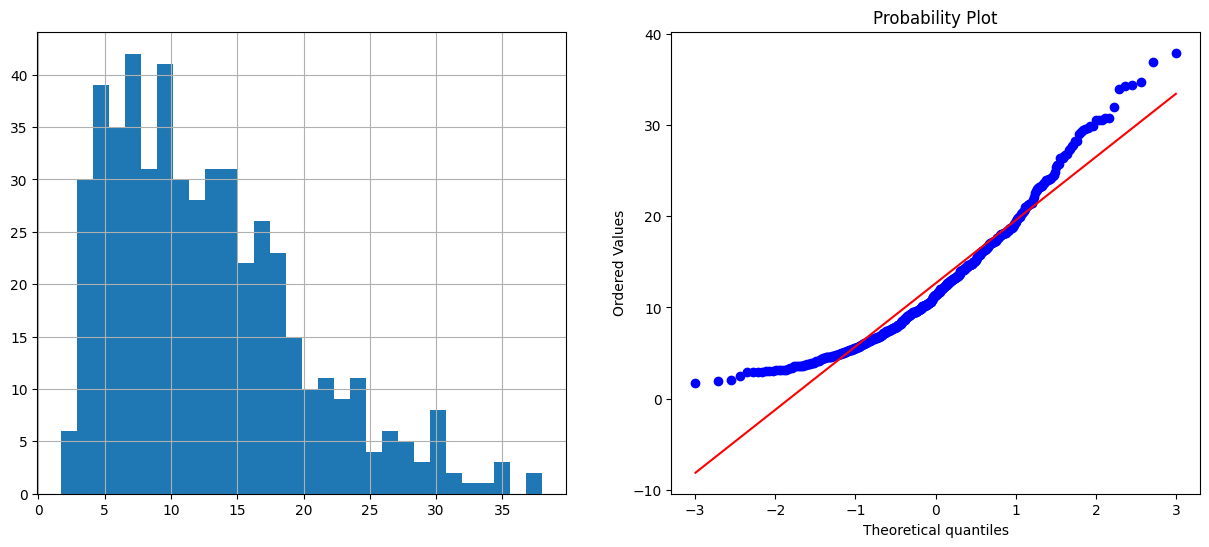

In [22]:
# visualizamos la transformación
diagnostic_functions.diagnostic_plots1(data_tf, 'LSTAT')

### Implementar las transformaciones anteriores utilizando scikit-learn